# General Melting Point Prediction on a Diverse Compound Data Set
 > `Study of influence of molecular properties on melting points through Machine Learning models`

**_Melting point_** : The temperature at which, the solid and the liquid states of a compound are in equilibrium.

During this process, all the heat input is consumed as heat of fusion, and the temperature remains _relatively_ constant.
It can be used for estimating the purity and identity of a substance during organic synthesis and also for predicting properties like water solubility, which is mainly concerned with the _pharmaceutical industry as a prognostic measure of intestinal absorption_.

Determination of melting points is one of the oldest identification and testing methods for organic compounds, in particular. Due to the ease of measuring melting points, extensive collections of tables giving exact values of melting points for pure, organic and inorganic compounds are available. The present data set exclusively excludes inorganic compounds.

This data set is composed of 4401 compounds along with a large number of molecular descriptors to capture the physicochemical properties of compounds. Principal Component Analysis is used for dimensionality reduction, while a number of Machine Learning models have been used for model generation. 

In general, it is _challenging_ to predict melting point of compounds as it is a fundamental physicochemical property controlled by both single molecule properties and intermolecular interactions (_spatial arrangement, lattice structure, presence of electronegative atoms thereby inducing dipole interactions etc.,_). Hence, melting point models for large data sets are uncommon.

To begin with, 
## importing the required packages.......

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import SGDRegressor, LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from math import *
from keras.optimizers import SGD

In [36]:
#load the tsv files of the features and respective responses
df=pd.read_csv('MP_Data.tsv', sep='\t', index_col=False)
tt_df=df.rename(columns={'x':'test_train'})

In [37]:
x_df=pd.read_csv('MP_Descriptors.tsv', sep='\t', index_col=False)

In [38]:
y_df_init=pd.read_csv('MP_Outcome.tsv', sep='\t')
y_df=y_df_init.rename(columns={'x':'outcome'})
y_df.head()

,outcome
0,14.0
1,20.5
2,27.5
3,30.5
4,31.0


Sorting the giving data set of 4401 into a principal data set and external validation set, 

In [39]:
#sort the data according to external and principal datasets sets
x_dataset_init_df=x_df[tt_df['test_train']=='Train']
x_external_init_df=x_df[tt_df['test_train']=='Test']

y_dataset_init_df=y_df[tt_df['test_train']=='Train']
y_external_init_df=y_df[tt_df['test_train']=='Test']

In [40]:
x_dataset_init_df.shape, y_dataset_init_df.shape, x_external_init_df.shape, y_external_init_df.shape

((4126, 202), (4126, 1), (275, 202), (275, 1))

In [41]:
x_dataset_init_df.head()

,diameter,petitjean,petitjeanSC,radius,VDistEq,VDistMa,weinerPath,weinerPol,a_aro,a_count,...,FASA_P,FCASA.,FCASA..1,VSA,dens,glob,std_dim1,std_dim2,std_dim3,vol
0,5,0.400000,0.666667,3,2.037476,6.011166,82,9,6,15,...,0.129128,0.326050,0.224950,138.13699,0.958985,0.031032,1.853123,1.382682,0.326444,123.18750
1,9,0.444444,0.800000,5,2.954872,8.805204,1046,40,11,31,...,0.059026,0.847237,1.136764,296.30197,1.296254,0.258447,2.394159,1.966377,1.217135,262.82812
2,10,0.500000,1.000000,5,3.083532,8.211762,742,24,12,35,...,0.046707,0.817581,0.464419,296.54431,0.946322,0.162139,3.164745,1.552043,1.274330,266.62500
3,7,0.428571,0.750000,4,2.616827,7.313269,288,20,10,20,...,0.044688,0.417896,0.574827,187.43799,1.195242,0.018573,2.524826,1.446899,0.344087,164.95312
4,7,0.428571,0.750000,4,2.609669,6.833154,203,13,6,22,...,0.103925,0.595412,0.267278,193.42802,0.978233,0.088156,2.550456,1.430062,0.757260,165.79688


In [42]:
x_dataset_df=np.array(x_dataset_init_df)
x_external_df=np.array(x_external_init_df)
x_dataset_df.shape, x_external_df.shape

((4126, 202), (275, 202))

In [43]:
y_dataset_df=np.array(y_dataset_init_df)
y_external_df=np.array(y_external_init_df)

In [44]:
#normalize the output
y_scaler=StandardScaler()
y_scaler.fit(y_dataset_df)
y_train_norm=y_scaler.transform(y_dataset_df)
y_external_norm=y_scaler.transform(y_external_df)

In [45]:
#normalize the inputs
x_scaler=StandardScaler()
x_scaler.fit(x_dataset_df)
x_train_pca=x_scaler.transform(x_dataset_df)
x_external_pca=x_scaler.transform(x_external_df)

## Principal Component Analysis(PCA)

PCA is an unsupervised learning method, often used for data visualization and data preprocessing. It essentially involves computing the principal components and their subsequent usage in understanding the data. Apart from producing derived variables for use in supervised learning, PCA also serves as a tool for data visualization. 

PCA seeks a small number of dimensions which explain maximum variance in the data. Each of these dimensions is a linear combination of the p features of each observation.

PC<sub>1</sub> = $\phi$ <sub>11</sub> X <sub>1</sub> + $\phi$<sub>21</sub> X<sub>2</sub> + .... + $\phi$<sub>p1</sub> X<sub>p</sub>

where $\phi$<sub>11</sub>......$\phi$<sub>p1</sub> are the loading of the first principal component which make up the first principal component vector

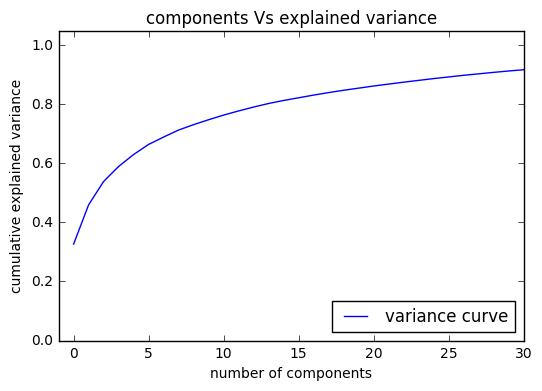

In [46]:
#feature selection
pca=PCA().fit(x_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='variance curve')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.05])
plt.xlim([-1, 30])
plt.title('components Vs explained variance')
plt.show()

In [47]:
pca=PCA(n_components=30)#from the literature
pca.fit(x_train_pca)
x_train_norm=pca.transform(x_train_pca)
x_external_norm=pca.transform(x_external_pca)

x_train_norm.shape, x_external_norm.shape

((4126, 30), (275, 30))

In [48]:
pc_1=x_train_norm[:, 1]
pc_2=x_train_norm[:, 2]
pc_ex_1 = x_external_norm[:,1]
pc_ex_2 = x_external_norm[:,2]

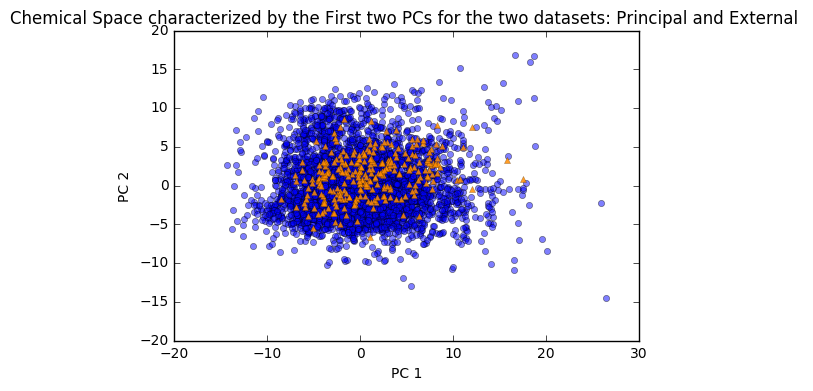

In [49]:
#Chemical space of the training and validation sets
for i in range(0, 4126):
    plt.scatter(pc_1[i], pc_2[i], c='b', alpha=0.5, marker='o', lw=0.5)
plt.hold(True)
for i in range(0, 275):    
    plt.scatter(pc_ex_1[i], pc_ex_2[i], c='darkorange', alpha=0.85, marker = '^', lw=0.15)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Chemical Space characterized by the First two PCs for the two datasets: Principal and External ')
#plt.legend(loc='lower right')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(x_train_norm, y_train_norm, test_size=0.2)
x_training_set.shape, x_test_set.shape, y_training_set.shape, y_test_set.shape

((3300, 30), (826, 30), (3300, 1), (826, 1))

In [51]:
#model building-linear regression
regr=linear_model.LinearRegression()
regr.fit(x_training_set, y_training_set)
y_predict_linear=regr.predict(x_test_set)

#evaluate the model

r2_linear=r2_score(y_test_set, y_predict_linear)
print('r2:',r2_linear)
mse_linear=mean_squared_error(y_test_set, y_predict_linear)
print('mse :',mse_linear)
rmse_linear=sqrt(mse_linear)
print('rmse:', rmse_linear)
mae_linear=mean_absolute_error(y_test_set, y_predict_linear)
print('mae:', mae_linear)

r2: 0.364334288497
mse : 0.650905959662
rmse: 0.8067874315220831
mae: 0.633199204989


In [52]:
#evaluate the model on the validation set
y_predict_linear_ex=regr.predict(x_external_norm)
r2_linear_ex=r2_score(y_external_norm, y_predict_linear_ex)
mse_linear_ex=mean_squared_error(y_external_norm, y_predict_linear_ex)
rmse_linear_ex=sqrt(mse_linear_ex)
mae_linear_ex=mean_absolute_error(y_external_norm, y_predict_linear_ex)

print('r2_validation_set:', r2_linear_ex)
print('rmse_validation_set:', rmse_linear_ex)
print('mse_validation_set:', mse_linear_ex)
print('mae_validation_set:', mae_linear_ex)

r2_validation_set: 0.198437093694
rmse_validation_set: 0.7623925931317417
mse_validation_set: 0.581242466062
mae_validation_set: 0.593648070373


### Parity plot
> `A scatter plot comparing the experimental data against the measured data`

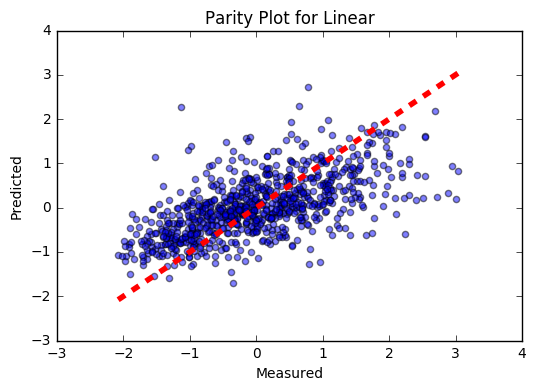

In [53]:
#parity plot for linear regression
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_linear, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()],'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for Linear')
plt.show()

In [54]:
regr.score(x_training_set, y_training_set)

0.44800339661367572

In [55]:
#Lasso
regr_lasso=linear_model.Lasso(alpha=0.01)
regr_lasso.fit(x_training_set, y_training_set)
y_predict_lasso=regr_lasso.predict(x_test_set)

#evaluate

mse_lasso=mean_squared_error(y_test_set, y_predict_lasso)
rmse_lasso=sqrt(mse_lasso)
mae_lasso=mean_absolute_error(y_test_set, y_predict_lasso)
r2_lasso=r2_score(y_test_set, y_predict_lasso)
print('r2 for lasso:',r2_lasso)
print('rmse for lasso', rmse_lasso)
print('mae for lasso', mae_lasso)

r2 for lasso: 0.368072786178
rmse for lasso 0.8044114808614613
mae for lasso 0.633482637675


In [56]:
#evaluate the model on validation set

y_predict_lasso_ex=regr_lasso.predict(x_external_norm)
r2_lasso_ex=r2_score(y_external_norm, y_predict_lasso_ex)
mse_lasso_ex=mean_squared_error(y_external_norm, y_predict_lasso_ex)
rmse_lasso_ex=sqrt(mse_lasso_ex)
mae_lasso_ex=mean_absolute_error(y_external_norm, y_predict_lasso_ex)

print('r2_validation_set:', r2_lasso_ex)
print('rmse_validation_set:', rmse_lasso_ex)
print('mse_validation_set:', mse_lasso_ex)
print('mae_validation_set:', mae_lasso_ex)

r2_validation_set: 0.257483631886
rmse_validation_set: 0.7337749450777604
mse_validation_set: 0.538425670024
mae_validation_set: 0.578902252142


In [57]:
print(regr_lasso.coef_)

[ 0.03173478  0.02674877 -0.05521125  0.04678064  0.03170418 -0.05197588
 -0.01598229  0.14482575 -0.         -0.0881287   0.05107397  0.00093952
 -0.11087525  0.08622681 -0.03502405 -0.05321284  0.00122918  0.06409289
 -0.06192035  0.00515011 -0.06638396  0.04886377 -0.06532267  0.
 -0.05832796 -0.02399672  0.          0.0449678   0.06394252  0.06579106]


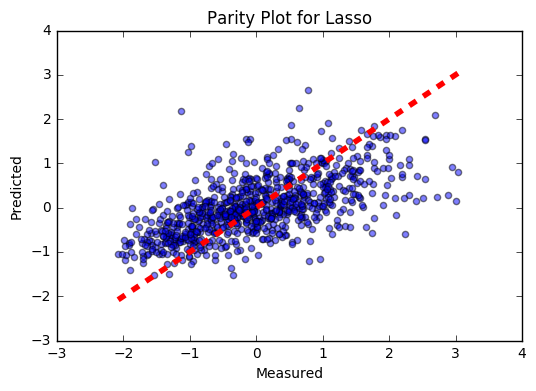

In [58]:
#parity plot for lasso
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_lasso, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for Lasso')
plt.show()

In [59]:
regr_lasso.score(x_training_set, y_training_set)

0.44662545429060052

In [60]:
#LassoCV
model_CV=LassoCV(cv=20).fit(x_training_set, y_training_set)
y_predict_CV = model_CV.predict(x_test_set)

#evaluate

mse_lassoCV=mean_squared_error(y_test_set, y_predict_CV)
rmse_lassoCV=sqrt(mse_lassoCV)
r2_lassoCV=r2_score(y_test_set, y_predict_CV)
mae_lassoCV=mean_absolute_error(y_test_set, y_predict_CV)

print('r2 for lassoCV:',r2_lassoCV)
print('rmse for lassoCV',rmse_lassoCV )
print('mae for lassoCV', mae_lassoCV)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 for lassoCV: 0.367910272453
rmse for lassoCV 0.804514910101622
mae for lassoCV 0.633222990436


In [61]:
print(model_CV.coef_)

[ 0.03176939  0.02685317 -0.05537441  0.04698293  0.03194045 -0.05221779
 -0.01633135  0.14521049 -0.         -0.08882822  0.05174986  0.00179204
 -0.11173833  0.08713604 -0.03594866 -0.05443089  0.00235723  0.0653783
 -0.06325539  0.00658654 -0.06784207  0.05050557 -0.06700884  0.         -0.06004
 -0.02586759  0.          0.04685578  0.06604231  0.06782317]


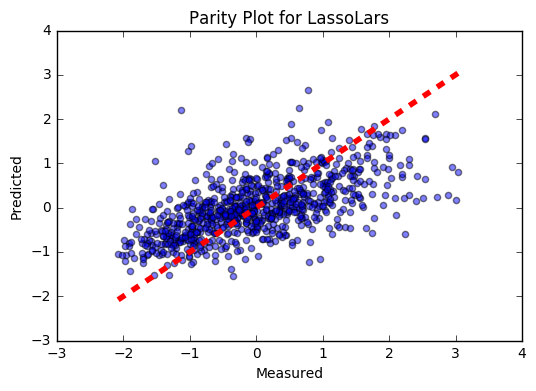

In [62]:
#parity plot for cross validated lasso
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_CV, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for LassoLars')
plt.show()

In [63]:
#LassoLarsCV
model_larsCV=LassoLarsCV(cv=20).fit(x_training_set, y_training_set)
y_predict_larsCV=model_larsCV.predict(x_test_set)

#evaluate
r2_larsCV=r2_score(y_test_set, y_predict_larsCV)
mse_larsCV=mean_squared_error(y_test_set, y_predict_larsCV)
rmse_larsCV=sqrt(mse_larsCV)
mae_larsCV=mean_absolute_error(y_test_set, y_predict_larsCV)
print('rmse for lassCV:', rmse_larsCV)
print('r2 for lasso larsCV:',r2_larsCV)
print('mae for larsCV:', mae_larsCV)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rmse for lassCV: 0.80366772838511
r2 for lasso larsCV: 0.369240795744
mae for larsCV: 0.633001711006


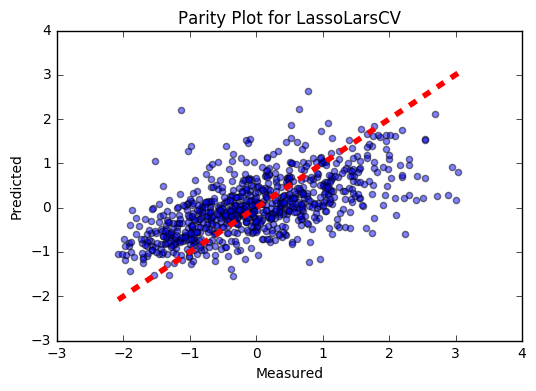

In [64]:
#parity plot for least angle regression lasso
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_larsCV, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for LassoLarsCV')
plt.show()

In [65]:
#Bayesian Ridge
regr_b=linear_model.BayesianRidge()
model_b=regr_b.fit(x_training_set, y_training_set)
y_predict_b=model_b.predict(x_test_set)

#evaluate

mse_b=mean_squared_error(y_test_set, y_predict_b)
rmse_b=sqrt(mse_b)
mae_b=mean_absolute_error(y_test_set, y_predict_b)
r2_b=r2_score(y_test_set, y_predict_b)
print('r2 for bayesian in true space:',r2_b)
print('rmse for bayesian in true space:', rmse_b)
print('mae for bayesian in true space:', mae_b)

r2 for bayesian in true space: 0.365360665442
rmse for bayesian in true space: 0.8061358291671502
mae for bayesian in true space: 0.633478293465


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


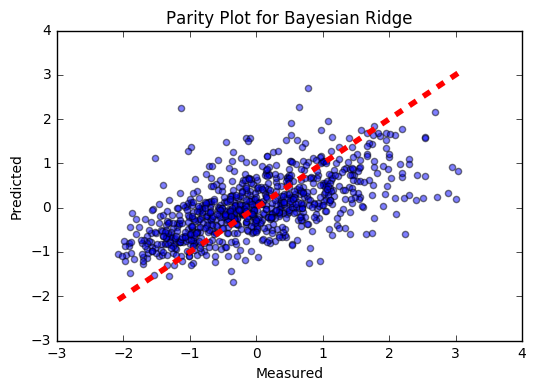

In [66]:
#parity plot for bayesian ridge
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_b, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for Bayesian Ridge')
plt.show()

In [67]:
#stochastic gradient descent
regr_sgd=SGDRegressor(loss='squared_loss', penalty=None, alpha=0.001, epsilon=0.0001)
model_sgd=regr_sgd.fit(x_training_set, y_training_set)
y_predict_sgd=model_sgd.predict(x_test_set)

#evaluate

mse_sgd=mean_squared_error(y_test_set, y_predict_sgd)
rmse_sgd=sqrt(mse_sgd)
mae_sgd=mean_absolute_error(y_test_set, y_predict_sgd)
r2_sgd=r2_score(y_test_set, y_predict_sgd)

print('r2 for sgd in true space:',r2_sgd)
print('rmse for sgd in true space:', rmse_sgd)
print('mae for sgd in true space:', mae_sgd)

r2 for sgd in true space: 0.3512494734
rmse for sgd in true space: 0.8150487632962011
mae for sgd in true space: 0.639749097182


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
#evaluate model on the external validation set
y_predict_sgd_ex=regr_sgd.predict(x_external_norm)
r2_sgd_ex=r2_score(y_external_norm, y_predict_sgd_ex)
mse_sgd_ex=mean_squared_error(y_external_norm, y_predict_sgd_ex)
rmse_sgd_ex=sqrt(mse_sgd_ex)
mae_sgd_ex=mean_absolute_error(y_external_norm, y_predict_sgd_ex)

print('r2_validation_set:', r2_sgd_ex)
print('rmse_validation_set:', rmse_sgd_ex)
print('mse_validation_set:', mse_sgd_ex)
print('mae_validation_set:', mae_sgd_ex)

r2_validation_set: -0.350503617368
rmse_validation_set: 0.9895955612121792
mse_validation_set: 0.979299374771
mae_validation_set: 0.804109991221


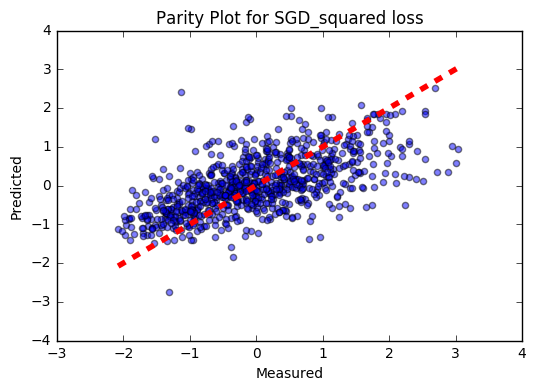

In [69]:
#parity plot for Stochastic Gradient Descent
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_sgd, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for SGD_squared loss')
plt.show()

In [70]:
regr_sgd2=linear_model.SGDRegressor(loss='huber', penalty=None)
model_sgd2=regr_sgd2.fit(x_training_set, y_training_set)
y_predict_sgd2=model_sgd2.predict(x_test_set)

#evaluate

mse_sgd2=mean_squared_error(y_test_set, y_predict_sgd2)
rmse_sgd2=sqrt(mse_sgd2)
mae_sgd2=mean_absolute_error(y_test_set, y_predict_sgd2)
r2_sgd2=r2_score(y_test_set, y_predict_sgd2)

print('r2 for sgd2 in true space:',r2_sgd2)
print('rmse for sgd2 in true space:', rmse_sgd2)
print('mae for sgd2 in true space:', mae_sgd2)

r2 for sgd2 in true space: 0.359571798986
rmse for sgd2 in true space: 0.8098040695617912
mae for sgd2 in true space: 0.626903974469


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
#evaluate sgd on external validation set
y_predict_sgd2_ex=regr_sgd2.predict(x_external_norm)
r2_sgd2_ex=r2_score(y_external_norm, y_predict_sgd2_ex)
mse_sgd2_ex=mean_squared_error(y_external_norm, y_predict_sgd2_ex)
rmse_sgd2_ex=sqrt(mse_sgd2_ex)
mae_sgd2_ex=mean_absolute_error(y_external_norm, y_predict_sgd2_ex)

print('r2_validation_set:', r2_sgd2_ex)
print('rmse_validation_set:', rmse_sgd2_ex)
print('mse_validation_set:', mse_sgd2_ex)
print('mae_validation_set:', mae_sgd2_ex)

r2_validation_set: 0.259173105875
rmse_validation_set: 0.7329396775202917
mse_validation_set: 0.537200570884
mae_validation_set: 0.581277616051


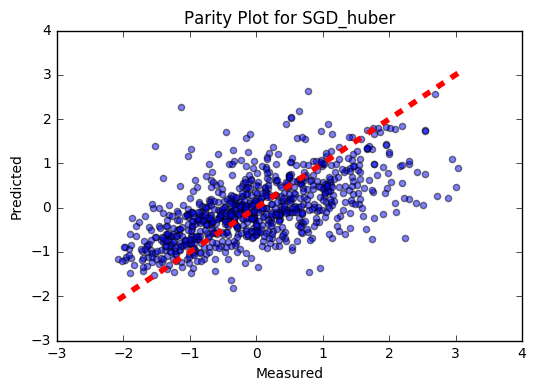

In [72]:
#parity plot for sgd_huber
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_sgd2, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for SGD_huber')
plt.show()

In [73]:
regr_sgd3=linear_model.SGDRegressor(loss='epsilon_insensitive', penalty='none', alpha=0.0001)
model_sgd3=regr_sgd3.fit(x_training_set, y_training_set)
y_predict_sgd3=model_sgd3.predict(x_test_set)

#evaluate

mse_sgd3=mean_squared_error(y_test_set, y_predict_sgd3)
rmse_sgd3=sqrt(mse_sgd3)
mae_sgd3=mean_absolute_error(y_test_set, y_predict_sgd3)
r2_sgd3=r2_score(y_test_set, y_predict_sgd3)

print('r2 for sgd3 in true space:',r2_sgd3)
print('rmse for sgd3 in true space:', rmse_sgd3)
print('mae for sgd3 in true space:', mae_sgd3)

r2 for sgd3 in true space: 0.327399402946
rmse for sgd3 in true space: 0.8298953961490811
mae for sgd3 in true space: 0.637774085647


C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


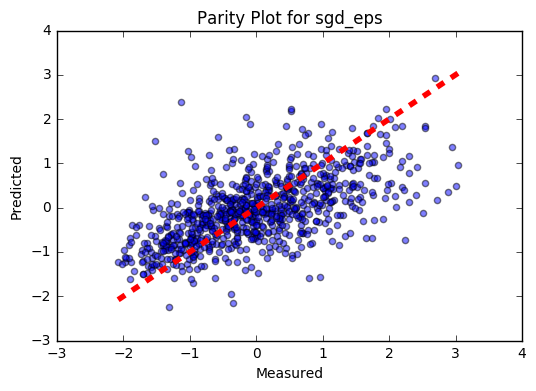

In [74]:
#parity plot for sgd_epsilon insensitive loss function
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_sgd3, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for sgd_eps')
plt.show()

In [75]:
#using tree
regr_tree=tree.DecisionTreeRegressor()
model_tree=regr_tree.fit(x_training_set, y_training_set)
y_predict_tree=model_tree.predict(x_test_set)

#evaluate

mse_tree=mean_squared_error(y_test_set, y_predict_tree)
rmse_tree=sqrt(mse_tree)
mae_tree=mean_absolute_error(y_test_set, y_predict_tree)
r2_tree=r2_score(y_test_set, y_predict_tree)
print('r2 for tree in true space:',r2_tree)
print('rmse for tree in true space:', rmse_tree)
print('mae for tree in true space:', mae_tree)

r2 for tree in true space: 0.0277563186052
rmse for tree in true space: 0.997774259311061
mae for tree in true space: 0.772555830459


In [76]:
#evaluating CART on external validation set
y_predict_tree_ex=regr_tree.predict(x_external_norm)
r2_tree_ex=r2_score(y_external_norm, y_predict_tree_ex)
mse_tree_ex=mean_squared_error(y_external_norm, y_predict_tree_ex)
rmse_tree_ex=sqrt(mse_tree_ex)
mae_tree_ex=mean_absolute_error(y_external_norm, y_predict_tree_ex)

print('r2_validation_set:', r2_tree_ex)
print('rmse_validation_set:', rmse_tree_ex)
print('mse_validation_set:', mse_tree_ex)
print('mae_validation_set:', mae_tree_ex)

r2_validation_set: -1.83884002272
rmse_validation_set: 1.4347635086168304
mse_validation_set: 2.05854632566
mae_validation_set: 1.13944734586


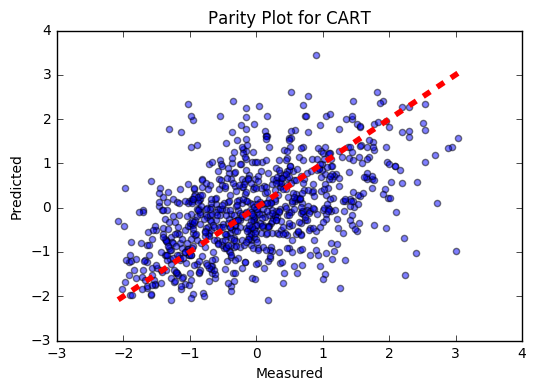

In [77]:
#parity plot for CART 
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_tree, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for CART')
plt.show()

In [78]:
#Ridge
regr_ridge=linear_model.Ridge(alpha=0.75)
model_ridge=regr_ridge.fit(x_training_set, y_training_set)
y_predict_ridge=model_ridge.predict(x_test_set)

#evaluate

mse_ridge=mean_squared_error(y_test_set, y_predict_ridge)
rmse_ridge=sqrt(mse_ridge)
mae_ridge=mean_absolute_error(y_test_set, y_predict_ridge)
r2_ridge=r2_score(y_test_set, y_predict_ridge)
print('r2 for ridge in true space:',r2_ridge)
print('rmse for ridge in true space:', rmse_ridge)
print('mae for ridge in true space:', mae_ridge)

r2 for ridge in true space: 0.364340115587
rmse for ridge in true space: 0.8067837336402037
mae for ridge in true space: 0.633200313494


In [79]:
#evaluate the model on external validation set
y_predict_ridge_ex=regr_ridge.predict(x_external_norm)
r2_ridge_ex=r2_score(y_external_norm, y_predict_ridge_ex)
mse_ridge_ex=mean_squared_error(y_external_norm, y_predict_ridge_ex)
rmse_ridge_ex=sqrt(mse_ridge_ex)
mae_ridge_ex=mean_absolute_error(y_external_norm, y_predict_ridge_ex)

print('r2_validation_set:', r2_ridge_ex)
print('rmse_validation_set:', rmse_ridge_ex)
print('mse_validation_set:', mse_ridge_ex)
print('mae_validation_set:', mae_ridge_ex)

r2_validation_set: 0.198557582399
rmse_validation_set: 0.7623352906120118
mse_validation_set: 0.581155095313
mae_validation_set: 0.593614652941


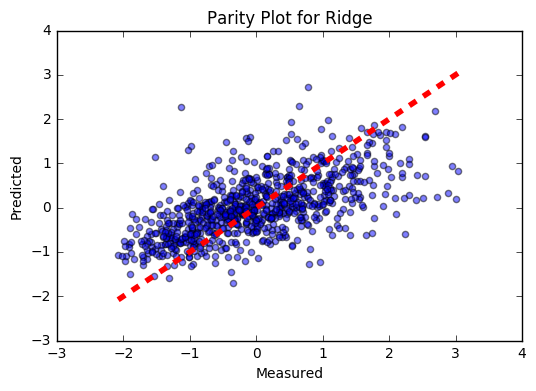

In [80]:
#parity plot for Ridge
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_ridge, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for Ridge')
plt.show()

In [81]:
#Kernel Ridge
regr_kr=KernelRidge(alpha=1.0)
model_kr=regr_kr.fit(x_training_set, y_training_set)
y_predict_kr=model_kr.predict(x_test_set)

#evaluate

mse_kr=mean_squared_error(y_test_set, y_predict_kr)
rmse_kr=sqrt(mse_kr)
mae_kr=mean_absolute_error(y_test_set, y_predict_kr)
r2_kr=r2_score(y_test_set, y_predict_kr)
print('r2 for kernel ridge in true space:',r2_kr)
print('rmse for kernel ridge in true space:', rmse_kr)
print('mae for kernel ridge in true space:', mae_kr)

r2 for kernel ridge in true space: 0.364639510798
rmse for kernel ridge in true space: 0.806593714070632
mae for kernel ridge in true space: 0.63257220402


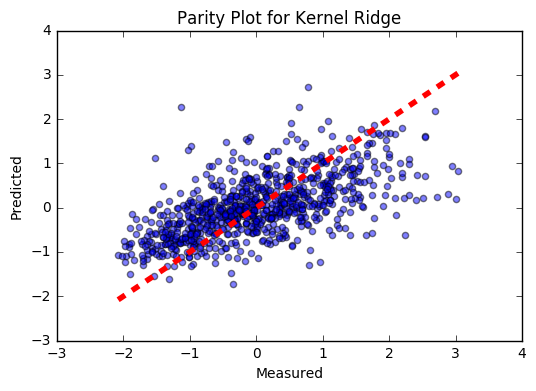

In [82]:
#parity plot for kernal ridge
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_kr, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for Kernel Ridge')
plt.show()

In [83]:
#support vector machines
svr_rbf=SVR(kernel='rbf', C=1e3)
model_rbf=svr_rbf.fit(x_training_set, y_training_set)
y_predict_rbf=model_rbf.predict(x_test_set)

#evaluate

mse_rbf=mean_squared_error(y_test_set, y_predict_rbf)
rmse_rbf=sqrt(mse_rbf)
mae_rbf=mean_absolute_error(y_test_set, y_predict_rbf)
r2_rbf=r2_score(y_test_set, y_predict_rbf)
print('r2 for svm.rbf in true space:',r2_rbf)
print('rmse for svm.rbf in true space:', rmse_rbf)
print('mae for svm.rbf in true space:', mae_rbf)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 for svm.rbf in true space: 0.414204776491
rmse for svm.rbf in true space: 0.7744932626898772
mae for svm.rbf in true space: 0.590130776459


In [84]:
#evaluate the model on external validation set
y_predict_svr_rbf_ex=svr_rbf.predict(x_external_norm)
r2_svr_rbf_ex=r2_score(y_external_norm, y_predict_svr_rbf_ex)
mse_svr_rbf_ex=mean_squared_error(y_external_norm, y_predict_svr_rbf_ex)
rmse_svr_rbf_ex=sqrt(mse_svr_rbf_ex)
mae_svr_rbf_ex=mean_absolute_error(y_external_norm, y_predict_svr_rbf_ex)

print('r2_validation_set:', r2_svr_rbf_ex)
print('rmse_validation_set:', rmse_svr_rbf_ex)
print('mse_validation_set:', mse_svr_rbf_ex)
print('mae_validation_set:', mae_svr_rbf_ex)

r2_validation_set: -0.168767758
rmse_validation_set: 0.9206063665356551
mse_validation_set: 0.847516082106
mae_validation_set: 0.753380646157


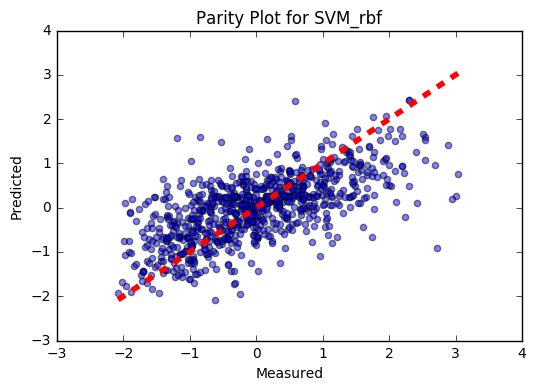

In [85]:
#parity plot for SVM_rbf
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_rbf, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for SVM_rbf')
plt.show()

In [86]:
svr_sig=SVR(kernel='sigmoid', C=1e3)
model_sig=svr_sig.fit(x_training_set, y_training_set)
y_predict_sig=model_sig.predict(x_test_set)

#evaluate

mse_sig=mean_squared_error(y_test_set, y_predict_sig)
rmse_sig=sqrt(mse_sig)
mae_sig=mean_absolute_error(y_test_set, y_predict_sig)
r2_sig=r2_score(y_test_set, y_predict_sig)

print('r2 for svm.sig in true space:',r2_sig)
print('rmse for svm.sig in true space:', rmse_sig)
print('mae for svm.sig in true space:', mae_sig)

C:\Users\saiva\Miniconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2 for svm.sig in true space: -53595254745.7
rmse for svm.sig in true space: 234265.26566954277
mae for svm.sig in true space: 193134.407686


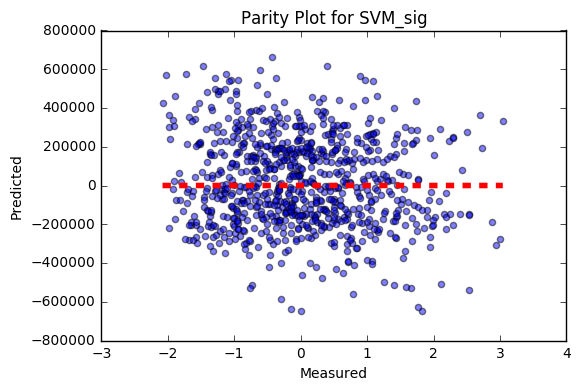

In [87]:
fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predict_sig, edgecolors=(0, 0, 0), alpha=0.5)
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Parity Plot for SVM_sig')
plt.show()

In [88]:
#C=np.array([rmse_linear, rmse_lasso, rmse_lassoCV, rmse_larsCV, rmse_b, rmse_sgd, rmse_sgd2, rmse_sgd3, rmse_tree, rmse_ridge, rmse_kr, rmse_rbf, rmse_rbf])
#C

In [109]:
C=np.array([r2_linear, r2_lasso, r2_lassoCV, r2_larsCV, r2_b, r2_sgd, r2_sgd2, r2_sgd3, r2_tree, r2_ridge, r2_kr, r2_rbf, 0.503])
C

array([ 0.36433429,  0.36807279,  0.36791027,  0.3692408 ,  0.36536067,
        0.35124947,  0.3595718 ,  0.3273994 ,  0.02775632,  0.36434012,
        0.36463951,  0.41420478,  0.503     ])

In [110]:
D=np.array(np.arange(1, 14.0, 1))
D

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.])

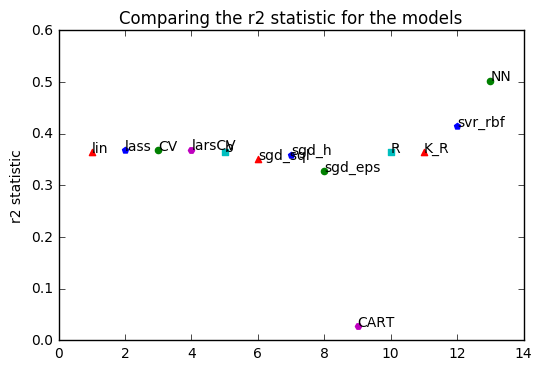

In [111]:
plt.scatter(D[0],C[0], color='r',marker='^', alpha=1)
plt.scatter(D[1],C[1], color='b',marker='p', alpha=1)
plt.scatter(D[2],C[2], color='g',marker='o', alpha=1)
plt.scatter(D[3],C[3], color='m',marker='H', alpha=1)
plt.scatter(D[4],C[4], color='c',marker='s', alpha=1)
plt.scatter(D[5],C[5], color='r',marker='^', alpha=1)
plt.scatter(D[6],C[6], color='b',marker='p', alpha=1)
plt.scatter(D[7],C[7], color='g',marker='o', alpha=1)
plt.scatter(D[8],C[8], color='m',marker='H', alpha=1)
plt.scatter(D[9],C[9], color='c',marker='s', alpha=1)
plt.scatter(D[10],C[10], color='r',marker='^', alpha=1)
plt.scatter(D[11],C[11], color='b',marker='p', alpha=1)
plt.scatter(D[12],C[12], color='g',marker='o', alpha=1)
#plt.scatter(D[13],C[13], color='m',marker='H', alpha=1)
#plt.scatter(D[14],C[14], color='m',marker='H', alpha=1)
n=['lin','lass','CV','larsCV','b','sgd_sql','sgd_h','sgd_eps','CART','R','K_R','svr_rbf', 'NN']
for i, txt in enumerate(n):
    plt.annotate(txt, (D[i],C[i]))

plt.ylabel('r2 statistic')
plt.title('Comparing the r2 statistic for the models')
plt.show()

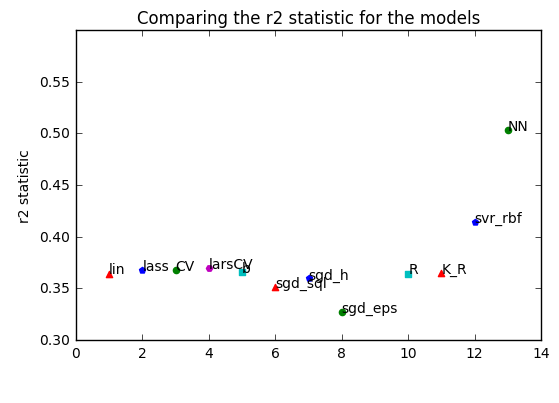

In [112]:
plt.scatter(D[0],C[0], color='r',marker='^', alpha=1)
plt.scatter(D[1],C[1], color='b',marker='p', alpha=1)
plt.scatter(D[2],C[2], color='g',marker='o', alpha=1)
plt.scatter(D[3],C[3], color='m',marker='H', alpha=1)
plt.scatter(D[4],C[4], color='c',marker='s', alpha=1)
plt.scatter(D[5],C[5], color='r',marker='^', alpha=1)
plt.scatter(D[6],C[6], color='b',marker='p', alpha=1)
plt.scatter(D[7],C[7], color='g',marker='o', alpha=1)
plt.scatter(D[8],C[8], color='m',marker='H', alpha=1)
plt.scatter(D[9],C[9], color='c',marker='s', alpha=1)
plt.scatter(D[10],C[10], color='r',marker='^', alpha=1)
plt.scatter(D[11],C[11], color='b',marker='p', alpha=1)
plt.scatter(D[12],C[12], color='g',marker='o', alpha=1)
#plt.scatter(D[13],C[13], color='m',marker='H', alpha=1)
#plt.scatter(D[14],C[14], color='m',marker='H', alpha=1)
n=['lin','lass','CV','larsCV','b','sgd_sql','sgd_h','sgd_eps','CART','R','K_R','svr_rbf', 'NN']
for i, txt in enumerate(n):
    plt.annotate(txt, (D[i],C[i]))

plt.ylabel('r2 statistic')
plt.ylim([0.30, 0.6])
plt.title('Comparing the r2 statistic for the models')
plt.show()

In [93]:
C=np.array([rmse_linear, rmse_lasso, rmse_lassoCV, rmse_larsCV, rmse_b, rmse_sgd, rmse_sgd2, rmse_sgd3, rmse_tree, rmse_ridge, rmse_kr, rmse_rbf])
C

array([ 0.80678743,  0.80441148,  0.80451491,  0.80366773,  0.80613583,
        0.81504876,  0.80980407,  0.8298954 ,  0.99777426,  0.80678373,
        0.80659371,  0.77449326])

In [94]:
D=np.array(np.arange(1, 13.0, 1))
D

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

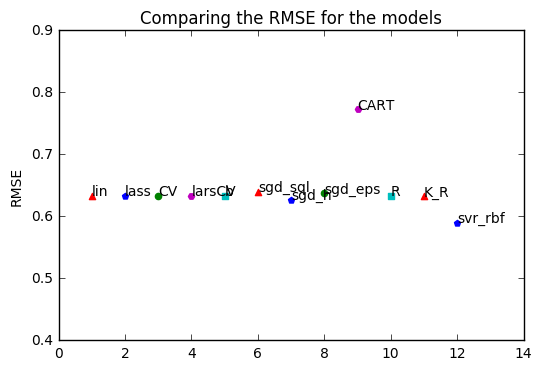

In [107]:
plt.scatter(D[0],C[0], color='r',marker='^', alpha=1)
plt.scatter(D[1],C[1], color='b',marker='p', alpha=1)
plt.scatter(D[2],C[2], color='g',marker='o', alpha=1)
plt.scatter(D[3],C[3], color='m',marker='H', alpha=1)
plt.scatter(D[4],C[4], color='c',marker='s', alpha=1)
plt.scatter(D[5],C[5], color='r',marker='^', alpha=1)
plt.scatter(D[6],C[6], color='b',marker='p', alpha=1)
plt.scatter(D[7],C[7], color='g',marker='o', alpha=1)
plt.scatter(D[8],C[8], color='m',marker='H', alpha=1)
plt.scatter(D[9],C[9], color='c',marker='s', alpha=1)
plt.scatter(D[10],C[10], color='r',marker='^', alpha=1)
plt.scatter(D[11],C[11], color='b',marker='p', alpha=1)
#plt.scatter(D[12],C[12], color='g',marker='o', alpha=1)
#plt.scatter(D[13],C[13], color='m',marker='H', alpha=1)
#plt.scatter(D[14],C[14], color='m',marker='H', alpha=1)
n=['lin','lass','CV','larsCV','b','sgd_sql','sgd_h','sgd_eps','CART','R','K_R','svr_rbf']
for i, txt in enumerate(n):
    plt.annotate(txt, (D[i],C[i]))

plt.ylabel('RMSE')
plt.ylim([0.40, 0.9])
plt.title('Comparing the RMSE for the models')
plt.show()

In [96]:
C=np.array([mae_linear, mae_lasso, mae_lassoCV, mae_larsCV, mae_b, mae_sgd, mae_sgd2, mae_sgd3, mae_tree, mae_ridge, mae_kr, mae_rbf])
C

array([ 0.6331992 ,  0.63348264,  0.63322299,  0.63300171,  0.63347829,
        0.6397491 ,  0.62690397,  0.63777409,  0.77255583,  0.63320031,
        0.6325722 ,  0.59013078])

In [97]:
D=np.array(np.arange(1, 13.0, 1))
D

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

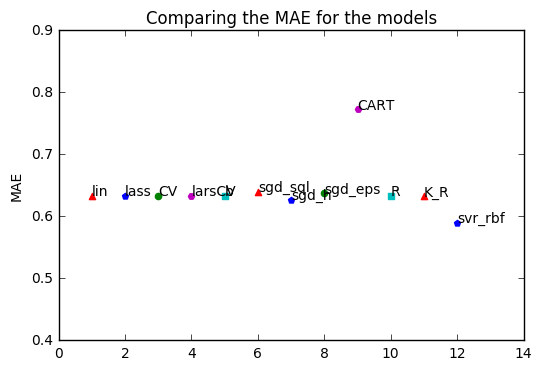

In [108]:
plt.scatter(D[0],C[0], color='r',marker='^', alpha=1)
plt.scatter(D[1],C[1], color='b',marker='p', alpha=1)
plt.scatter(D[2],C[2], color='g',marker='o', alpha=1)
plt.scatter(D[3],C[3], color='m',marker='H', alpha=1)
plt.scatter(D[4],C[4], color='c',marker='s', alpha=1)
plt.scatter(D[5],C[5], color='r',marker='^', alpha=1)
plt.scatter(D[6],C[6], color='b',marker='p', alpha=1)
plt.scatter(D[7],C[7], color='g',marker='o', alpha=1)
plt.scatter(D[8],C[8], color='m',marker='H', alpha=1)
plt.scatter(D[9],C[9], color='c',marker='s', alpha=1)
plt.scatter(D[10],C[10], color='r',marker='^', alpha=1)
plt.scatter(D[11],C[11], color='b',marker='p', alpha=1)
#plt.scatter(D[12],C[12], color='g',marker='o', alpha=1)
#plt.scatter(D[13],C[13], color='m',marker='H', alpha=1)
#plt.scatter(D[14],C[14], color='m',marker='H', alpha=1)
n=['lin','lass','CV','larsCV','b','sgd_sql','sgd_h','sgd_eps','CART','R','K_R','svr_rbf']
for i, txt in enumerate(n):
    plt.annotate(txt, (D[i],C[i]))

plt.ylabel('MAE')
plt.ylim([0.4, 0.9])
plt.title('Comparing the MAE for the models')
plt.show()

**NEURAL NETWORK**

In [99]:
#DIFFERENT TOPOLOGIES HAVE BEEN GIVEN TO 2D , 3D AND 2D/3D DESCRIPTORS AND ITERATIONS OF CONJUGATED GRADIENT DESCENT GIVEN
def baseline_model():
    model=Sequential()
    #model.add(Dropout(0.2, input_shape=(30,)))
    model.add(Dense(27, init='normal', input_dim=30, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(20, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(18, init='normal', activation='relu'))
    #model.add(Dropout(0,2))
    #model.add(Dense(12, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(6, init='normal', activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(5, init='normal', activation='relu'))
    ##model.add(Dropout(0.2))
    model.add(Dense(1, init='normal'))
    # compile the model 
    epochs=100
    learning_rate=0.01
    momemtum=0.3
    decay=learning_rate/epochs
    sgd=SGD(lr=learning_rate, momentum=momemtum, decay=decay, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [100]:
seed=7
#fit and evaluate the NN
estimators=[]
#estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=50, batch_size=5, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, x_training_set, y_training_set, cv=kfold, scoring='r2')
results.mean(), results.std()

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(27, activation="relu", input_dim=30, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(27, activation="relu", input_dim=30, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__

(0.49680316024213356, 0.037493219754932652)

In [101]:
results_test=cross_val_score(pipeline, x_test_set, y_test_set, cv=kfold, scoring='r2')
results_test.mean(), results_test.std()

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(27, activation="relu", input_dim=30, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(27, activation="relu", input_dim=30, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__

(0.41905474190911496, 0.10970979909389589)

> **_Implementing different network topologies for neural networks_** 

In [102]:
def baseline_model():
    model=Sequential()
    model.add(Dense(25, init='normal', input_dim=30, activation='relu'))
    model.add(Dense(20, init='normal', activation='relu'))
    model.add(Dense(10, init='normal', activation='relu'))
    model.add(Dense(5, init='normal', activation='relu'))
    model.add(Dense(1, init='normal'))
    # compile the model 
    epochs=50
    learning_rate=0.01
    momemtum=0.3
    decay=learning_rate/epochs
    sgd=SGD(lr=learning_rate, momentum=momemtum, decay=decay, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [103]:
seed=7
#fit and evaluate the NN
estimators=[]
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=30, batch_size=5, verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(n_splits=10, shuffle=True, random_state=seed)
results=cross_val_score(pipeline, x_training_set, y_training_set, cv=kfold, scoring='r2')
results.mean(), results.std()

C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, activation="relu", input_dim=30, kernel_initializer="normal")`
  app.launch_new_instance()
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(5, activation="relu", kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
C:\Users\saiva\Miniconda3\lib\site-packages\

(0.50324959389964596, 0.031492283176306729)